In [1]:
import numpy as np
import pandas as pd

import pypsa

In [264]:
del(grid)

In [265]:
grid = pypsa.Network(name='WECC 3-machine, 9-bus system')

In [266]:
S_default=1 # MVA

S_base=100 # MVA
V_base=230 # kV

Z_base=(V_base**2)/S_base # Ohm

In [267]:
grid.add("Bus", "Bus 1", v_nom=16.5, v_mag_pu_set= 1.04, control="Slack")
grid.add("Bus", "Bus 2", v_nom=18.0, v_mag_pu_set= 1.025, control="PV")
grid.add("Bus", "Bus 3", v_nom=13.8, v_mag_pu_set= 1.025, control="PV")
grid.add("Bus", "Bus 4", v_nom=V_base)
grid.add("Bus", "Bus 5", v_nom=V_base, control="PQ")
grid.add("Bus", "Bus 6", v_nom=V_base, control="PQ")
grid.add("Bus", "Bus 7", v_nom=V_base)
grid.add("Bus", "Bus 8", v_nom=V_base, control="PQ")
grid.add("Bus", "Bus 9", v_nom=V_base)

grid.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
Bus 1,16.5,,0.0,0.0,AC,,1.040,0.0,inf,Slack,,
Bus 2,18.0,,0.0,0.0,AC,,1.025,0.0,inf,PV,,
Bus 3,13.8,,0.0,0.0,AC,,1.025,0.0,inf,PV,,
Bus 4,230.0,,0.0,0.0,AC,,1.000,0.0,inf,PQ,,
Bus 5,230.0,,0.0,0.0,AC,,1.000,0.0,inf,PQ,,
Bus 6,230.0,,0.0,0.0,AC,,1.000,0.0,inf,PQ,,
Bus 7,230.0,,0.0,0.0,AC,,1.000,0.0,inf,PQ,,
Bus 8,230.0,,0.0,0.0,AC,,1.000,0.0,inf,PQ,,
Bus 9,230.0,,0.0,0.0,AC,,1.000,0.0,inf,PQ,,


In [268]:
grid.add("Line", "Line 45", bus0="Bus 4", bus1="Bus 5", r=0.0100*(V_base**2), x=0.0850*(V_base**2), b=0.1760/(V_base**2))
grid.add("Line", "Line 46", bus0="Bus 4", bus1="Bus 6", r=0.0170*(V_base**2), x=0.0920*(V_base**2), b=0.1580/(V_base**2))
grid.add("Line", "Line 69", bus0="Bus 6", bus1="Bus 9", r=0.0390*(V_base**2), x=0.1700*(V_base**2), b=0.3580/(V_base**2))
grid.add("Line", "Line 57", bus0="Bus 5", bus1="Bus 7", r=0.0320*(V_base**2), x=0.1610*(V_base**2), b=0.3060/(V_base**2))
grid.add("Line", "Line 98", bus0="Bus 9", bus1="Bus 8", r=0.0119*(V_base**2), x=0.1008*(V_base**2), b=0.2090/(V_base**2))
grid.add("Line", "Line 78", bus0="Bus 7", bus1="Bus 8", r=0.0085*(V_base**2), x=0.0720*(V_base**2), b=0.1490/(V_base**2))

grid.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
Line 45,Bus 4,Bus 5,,4496.50,529.00,0.0,0.000003,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 46,Bus 4,Bus 6,,4866.80,899.30,0.0,0.000003,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 69,Bus 6,Bus 9,,8993.00,2063.10,0.0,0.000007,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 57,Bus 5,Bus 7,,8516.90,1692.80,0.0,0.000006,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 98,Bus 9,Bus 8,,5332.32,629.51,0.0,0.000004,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 78,Bus 7,Bus 8,,3808.80,449.65,0.0,0.000003,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
grid.add("Generator", "Generator 1", bus="Bus 1", control="Slack")
grid.add("Generator", "Generator 2", bus="Bus 2", p_set=1.63, control="PV")
grid.add("Generator", "Generator 3", bus="Bus 3", p_set=0.85, control="PV")

grid.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Generator 1,Bus 1,Slack,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Generator 2,Bus 2,PV,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Generator 3,Bus 3,PV,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [270]:
grid.add("Load", "Load 5", bus="Bus 5", p_set=1.25, q_set=0.50)
grid.add("Load", "Load 6", bus="Bus 6", p_set=0.90, q_set=0.30)
grid.add("Load", "Load 8", bus="Bus 8", p_set=1.00, q_set=0.35)

grid.loads

,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
Load 5,Bus 5,,,1.25,0.50,-1.0,True
Load 6,Bus 6,,,0.90,0.30,-1.0,True
Load 8,Bus 8,,,1.00,0.35,-1.0,True


In [271]:
grid.add("Transformer", "Transformer 1", bus1="Bus 4", bus0="Bus 1", r=0, x=0.0576, s_nom=1)
grid.add("Transformer", "Transformer 2", bus1="Bus 7", bus0="Bus 2", r=0, x=0.0625, s_nom=1)
grid.add("Transformer", "Transformer 3", bus1="Bus 9", bus0="Bus 3", r=0, x=0.0586, s_nom=1)

grid.transformers

,bus0,bus1,type,model,x,r,g,b,s_nom,s_nom_mod,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Transformer,,,,,,,,,,,,,,,,,,,,,
Transformer 1,Bus 1,Bus 4,,t,0.0576,0.0,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 2,Bus 2,Bus 7,,t,0.0625,0.0,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 3,Bus 3,Bus 9,,t,0.0586,0.0,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
grid.lpf()
grid.pf(use_seed=True)

INFO:pypsa.pf:Performing linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001F8FA47F790> for snapshot(s) Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001F8F6D61890> for snapshots Index(['now'], dtype='object', name='snapshot')


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         9.798341e-11,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [274]:
grid.branches()

active         b   b_pu  build_year   bus0   bus1  \
component   name                                                               
Transformer Transformer 1    True  0.000000  0.000           0  Bus 1  Bus 4   
            Transformer 2    True  0.000000  0.000           0  Bus 2  Bus 7   
            Transformer 3    True  0.000000  0.000           0  Bus 3  Bus 9   
Line        Line 45          True  0.000003  0.176           0  Bus 4  Bus 5   
            Line 46          True  0.000003  0.158           0  Bus 4  Bus 6   
            Line 69          True  0.000007  0.358           0  Bus 6  Bus 9   
            Line 57          True  0.000006  0.306           0  Bus 5  Bus 7   
            Line 98          True  0.000004  0.209           0  Bus 9  Bus 8   
            Line 78          True  0.000003  0.149           0  Bus 7  Bus 8   

                           capital_cost carrier committable  down_time_before  \
component   name                                                                
Transformer Transformer 1           0.0     NaN         NaN               NaN   
            Transformer 2           0.0     NaN         NaN               NaN   
            Transformer 3           0.0     NaN         NaN               NaN   
Line        Line 45                 0.0      AC         NaN               NaN   
            Line 46                 0.0      AC         NaN               NaN   
            Line 69                 0.0      AC         NaN               NaN   
            Line 57                 0.0      AC         NaN               NaN   
            Line 98                 0.0      AC         NaN               NaN   
            Line 78                 0.0      AC         NaN               NaN   

                           ...  tap_side  terrain_factor  type  \
component   name           ...                                   
Transformer Transformer 1  ...       0.0             NaN         
            Transformer 2  ...       0.0             NaN         
            Transformer 3  ...       0.0             NaN         
Line        Line 45        ...       NaN             1.0         
            Line 46        ...       NaN             1.0         
            Line 69        ...       NaN             1.0         
            Line 57        ...       NaN             1.0         
            Line 98        ...       NaN             1.0         
            Line 78        ...       NaN             1.0         

                           up_time_before  v_ang_max  v_ang_min  v_nom  \
component   name                                                         
Transformer Transformer 1             NaN        inf       -inf    NaN   
            Transformer 2             NaN        inf       -inf    NaN   
            Transformer 3             NaN        inf       -inf    NaN   
Line        Line 45                   NaN        inf       -inf  230.0   
            Line 46                   NaN        inf       -inf  230.0   
            Line 69                   NaN        inf       -inf  230.0   
            Line 57                   NaN        inf       -inf  230.0   
            Line 98                   NaN        inf       -inf  230.0   
            Line 78                   NaN        inf       -inf  230.0   

                                   x    x_pu x_pu_eff  
component   name                                       
Transformer Transformer 1     0.0576  0.0576   0.0576  
            Transformer 2     0.0625  0.0625   0.0625  
            Transformer 3     0.0586  0.0586   0.0586  
Line        Line 45        4496.5000  0.0850   0.0850  
            Line 46        4866.8000  0.0920   0.0920  
            Line 69        8993.0000  0.1700   0.1700  
            Line 57        8516.9000  0.1610   0.1610  
            Line 98        5332.3200  0.1008   0.1008  
            Line 78        3808.8000  0.0720   0.0720  

[9 rows x 61 columns]

In [275]:
grid.generators_t.p

Generator,Generator 1,Generator 2,Generator 3
snapshot,,,
now,0.71641,1.63,0.85


In [276]:
grid.generators_t.q

Generator,Generator 1,Generator 2,Generator 3
snapshot,,,
now,0.270459,0.066537,-0.108597


In [277]:
grid.loads_t.p, grid.loads_t.q

(Load      Load 5  Load 6  Load 8
 snapshot                        
 now         1.25     0.9     1.0,
 Load      Load 5  Load 6  Load 8
 snapshot                        
 now          0.5     0.3    0.35)

In [278]:
grid.buses_t.p

Bus,Bus 1,Bus 2,Bus 3,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,
now,0.71641,1.63,0.85,0.0,-1.25,-0.9,0.0,-1.0,0.0


In [279]:
grid.buses_t.q

Bus,Bus 1,Bus 2,Bus 3,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,
now,0.270459,0.066537,-0.108597,0.0,-0.5,-0.3,0.0,-0.35,0.0


In [280]:
grid.buses_t.v_mag_pu

Bus,Bus 1,Bus 2,Bus 3,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,
now,1.04,1.025,1.025,1.025788,0.995631,1.012654,1.025769,1.015883,1.032353


In [281]:
grid.buses_t.v_ang * 180 / np.pi

Bus,Bus 1,Bus 2,Bus 3,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,
now,0.0,9.280005,4.664751,-2.216788,-3.988805,-3.687396,3.719701,0.727536,1.966716


c:\Users\arsla\miniconda3\envs\UCB_ER254\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x1f8f9297790>,
 <matplotlib.collections.LineCollection at 0x1f8fa600590>)

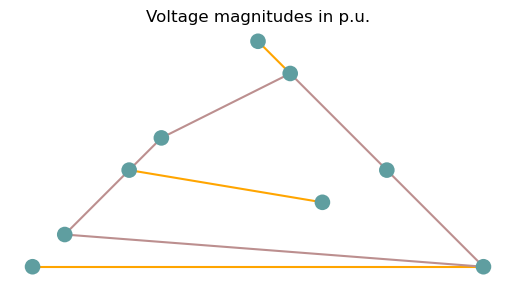

In [282]:
grid.plot(bus_sizes=1e-3, title="Voltage magnitudes in p.u.")

In [283]:
now = grid.snapshots[0]

angle_diff = pd.Series(grid.buses_t.v_ang.loc[now,grid.lines.bus0].values -
                       grid.buses_t.v_ang.loc[now,grid.lines.bus1].values,
                       index=grid.lines.index)

(angle_diff*180/np.pi).describe()

count    6.000000
mean    -0.981441
std      4.503378
min     -7.708506
25%     -3.930789
50%      1.354894
75%      1.696665
max      2.992165
dtype: float64